# Análises Preditivas

## Carregando dados

In [1]:
import yfinance

In [2]:
ticker = input("Digite o ticker da ação desejada: ")

Digite o ticker da ação desejada: PETR4.SA


In [3]:
acao = yfinance.Ticker(ticker).history("2y")

In [4]:
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-14 00:00:00-03:00,13.314213,13.428213,13.119464,13.119464,53159500,0.0,0
2020-12-15 00:00:00-03:00,13.119465,13.295214,13.119465,13.228715,47208200,0.0,0
2020-12-16 00:00:00-03:00,13.228715,13.413964,13.048215,13.390215,59399200,0.0,0
2020-12-17 00:00:00-03:00,13.442462,13.485212,13.333213,13.413962,39297700,0.0,0
2020-12-18 00:00:00-03:00,13.347464,13.451963,13.309464,13.347464,44707900,0.0,0
...,...,...,...,...,...,...,...
2022-12-08 00:00:00-03:00,25.549999,25.790001,24.639999,24.780001,55567700,0.0,0
2022-12-09 00:00:00-03:00,24.990000,25.049999,24.490000,24.709999,61586200,0.0,0
2022-12-12 00:00:00-03:00,24.580000,24.660000,23.129999,23.910000,111293100,0.0,0


<AxesSubplot:xlabel='Date'>

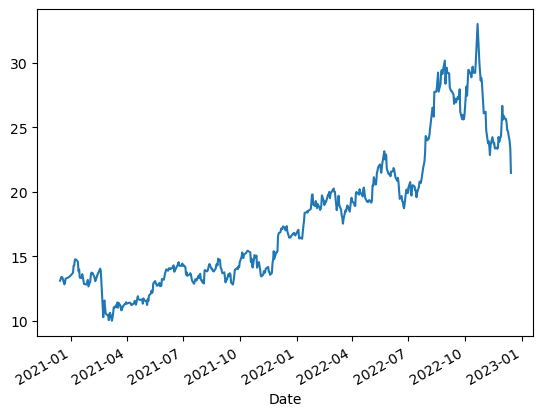

In [7]:
acao.Close.plot()

# Tratamento de dados

In [15]:
dados = acao.reset_index()
dados

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-14 00:00:00-03:00,13.314213,13.428213,13.119464,13.119464,53159500,0.0,0
1,2020-12-15 00:00:00-03:00,13.119465,13.295214,13.119465,13.228715,47208200,0.0,0
2,2020-12-16 00:00:00-03:00,13.228715,13.413964,13.048215,13.390215,59399200,0.0,0
3,2020-12-17 00:00:00-03:00,13.442462,13.485212,13.333213,13.413962,39297700,0.0,0
4,2020-12-18 00:00:00-03:00,13.347464,13.451963,13.309464,13.347464,44707900,0.0,0
...,...,...,...,...,...,...,...,...
492,2022-12-08 00:00:00-03:00,25.549999,25.790001,24.639999,24.780001,55567700,0.0,0
493,2022-12-09 00:00:00-03:00,24.990000,25.049999,24.490000,24.709999,61586200,0.0,0
494,2022-12-12 00:00:00-03:00,24.580000,24.660000,23.129999,23.910000,111293100,0.0,0
495,2022-12-13 00:00:00-03:00,24.100000,24.200001,23.309999,23.320000,102533100,0.0,0


In [21]:
colunas = ["Date", "Close"]
dados = dados[colunas]
dados["Date"] = dados["Date"].dt.tz_localize(None)
dados

,Date,Close
0,2020-12-14,13.119464
1,2020-12-15,13.228715
2,2020-12-16,13.390215
3,2020-12-17,13.413962
4,2020-12-18,13.347464
...,...,...
492,2022-12-08,24.780001
493,2022-12-09,24.709999
494,2022-12-12,23.910000
495,2022-12-13,23.320000


In [24]:
dados.columns = ["ds", "y"]
dados

,ds,y
0,2020-12-14,13.119464
1,2020-12-15,13.228715
2,2020-12-16,13.390215
3,2020-12-17,13.413962
4,2020-12-18,13.347464
...,...,...
492,2022-12-08,24.780001
493,2022-12-09,24.709999
494,2022-12-12,23.910000
495,2022-12-13,23.320000


# Treinando o modelo - Prophet

In [25]:
!pip install prophet

     --------------------------------------- 12.1/12.1 MB 23.3 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 81.2/81.2 kB 4.7 MB/s eta 0:00:00
     ------------------------------------- 187.5/187.5 kB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 45.7 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=9f92a09d42628015d98651930e41884cce18dcfce8f62eac37203096da8faef6
  Stored in directory: c:\users\jeron\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus


## Modelo de Previsões para PETR4

In [26]:
from prophet  import Prophet
from prophet.plot import plot_plotly

In [46]:
modelo = Prophet()
modelo.fit(dados)

21:58:50 - cmdstanpy - INFO - Chain [1] start processing
21:58:50 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
periodo = modelo.make_future_dataframe(180)

In [49]:
previsoes = modelo.predict(periodo)
plot_plotly(modelo, previsoes)